In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.stats as stats

In [2]:
responses = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\FSEV UK Survey\\responses.csv")
responses.head(10)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,19.0,184.0,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,18.0,166.0,55.0,1.0,female,right handed,secondary school,no,city,house/bungalow
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats


In [3]:
dataset = pd.concat([responses['Age'], 
                        responses['Gender'], 
                        responses['Finances'], 
                        responses['Branded clothing'], 
                        responses['Entertainment spending'], 
                        responses['Spending on healthy eating']], axis=1).dropna()


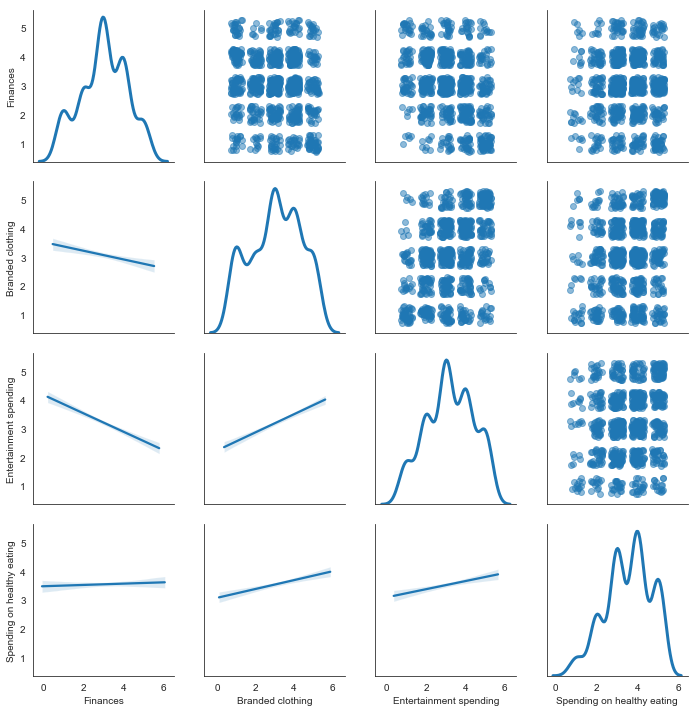

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# BIVARIATE TESTING #

sns.set_style('white')

# jittering
# Make a copy of the data to add jitter to and plot.
dataset_jittered = dataset.loc[:, 'Finances':'Spending on healthy eating']
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(dataset_jittered.shape)),
    columns=dataset_jittered.columns)
    
# Combine the data and the noise.
dataset_jittered = dataset_jittered.add(jitter)
    

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(dataset_jittered, diag_sharey=False)
# Scatterplot
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                                 Age  Finances  Branded clothing  \
Age                         1.000000  0.030029         -0.075160   
Finances                    0.030029  1.000000         -0.130898   
Branded clothing           -0.075160 -0.130898          1.000000   
Entertainment spending     -0.042923 -0.296856          0.332980   
Spending on healthy eating  0.011405  0.008367          0.176393   

                            Entertainment spending  Spending on healthy eating  
Age                                      -0.042923                    0.011405  
Finances                                 -0.296856                    0.008367  
Branded clothing                          0.332980                    0.176393  
Entertainment spending                    1.000000                    0.145514  
Spending on healthy eating                0.145514                    1.000000  


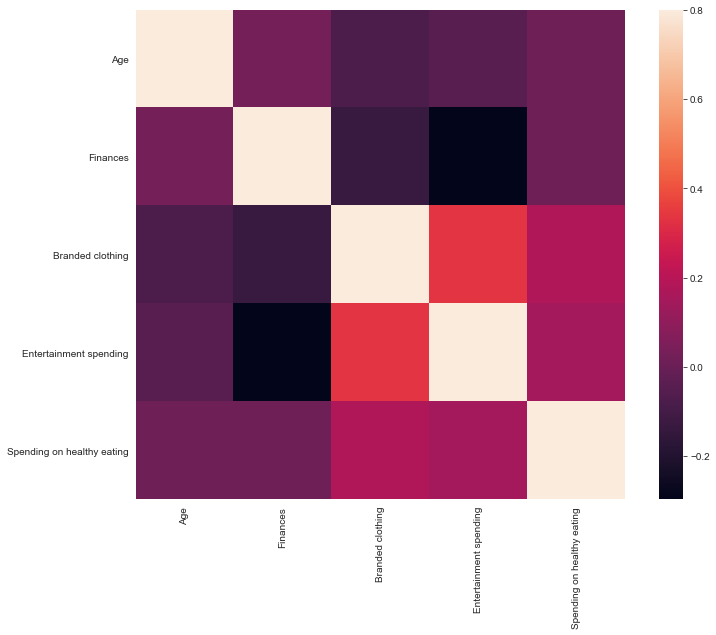

In [5]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

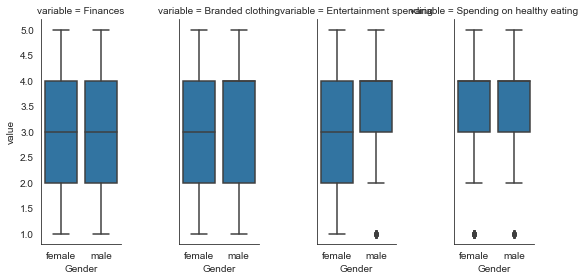

          Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Gender                                                             
female  583.0  20.106346  2.778602  15.0  18.0  20.0  21.0  30.0   
male    405.0  20.864198  2.796537  15.0  19.0  20.0  22.0  30.0   

       Branded clothing           ...  Finances       \
                  count      mean ...       75%  max   
Gender                            ...                  
female            583.0  2.876501 ...       4.0  5.0   
male              405.0  3.306173 ...       4.0  5.0   

       Spending on healthy eating                                               
                            count      mean       std  min  25%  50%  75%  max  
Gender                                                                          
female                      583.0  3.538593  1.097390  1.0  3.0  4.0  4.0  5.0  
male                        405.0  3.553086  1.094664 

In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For a continuous and a categorical pair

# Plot all the variables with boxplots for each feature.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = dataset
df_long = df_long.drop(['Age'], axis=1)
df_long = pd.melt(df_long, id_vars=['Gender'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Gender", "value")
plt.show()

# Descriptive statistics by group.
print(dataset.groupby('Gender').describe())

# Test whether group differences are significant.
for col in dataset.loc[:, 'Finances':'Spending on healthy eating'].columns:
    print(col)
    print(stats.ttest_ind(
        dataset[dataset['Gender'] == 'male'][col],
        dataset[dataset['Gender'] == 'female'][col]
    ))

In [7]:
# 10 New Features for analysis

#1- Age is under 21 - At average age or younger  
dataset['Under21'] = dataset['Age'] < 21
#2 - Age is under 18 - Considered a minor
dataset['Under18'] = dataset['Age'] < 18
#3 - Discresionary spending
dataset['Discres_spend'] = dataset['Branded clothing'].add(dataset['Entertainment spending'])
#4 - Male High Spenders - Above showed higher Entertainment/Branded Clothing spend among males
dataset['Spendhigh_male'] = (dataset['Discres_spend'] > 5) & (dataset['Gender'] == 'male')
#5 - Supersavers
dataset['Supersavers'] = dataset['Finances'] == 1
#6 - Female Healthy Eaters
dataset['Healthyeaters_female'] = dataset['Spending on healthy eating'] > 3
#7 - Male Healthy Eaters
dataset['Healthyeaters_male'] = dataset['Spending on healthy eating'] > 3
#8 - Older than 21 and Eating Healthy
dataset['Healthyeaters_Older21'] = (dataset['Age'] > 21) & (dataset['Spending on healthy eating'] > 3)
#9 - Young Women who like Brand name clothing
dataset['Youngfemales_Branded'] = (dataset['Under18'] == True) & (dataset['Branded clothing'] > 3)
#10 - Age + All spending habits
dataset['Agewithspending'] =  dataset['Age'].add(dataset['Entertainment spending']).add(dataset['Branded clothing']).add(dataset['Spending on healthy eating'])


In [8]:
dataset['Gender'] = (dataset['Gender'] == 'male')

In [9]:
datacorr = dataset.corr()
datalist = list(datacorr.loc[datacorr['Discres_spend'].abs() > .5].index)
print(datalist)

['Branded clothing', 'Entertainment spending', 'Discres_spend', 'Agewithspending']


In [10]:
# Use filtering methods to select the 5 best features and justify your choices.
dataset

,Age,Gender,Finances,Branded clothing,Entertainment spending,Spending on healthy eating,Under21,Under18,Discres_spend,Spendhigh_male,Supersavers,Healthyeaters_female,Healthyeaters_male,Healthyeaters_Older21,Youngfemales_Branded,Agewithspending
0,20.0,False,3.0,5.0,3.0,3.0,True,False,8.0,False,False,False,False,False,False,31.0
1,19.0,False,3.0,1.0,4.0,2.0,True,False,5.0,False,False,False,False,False,False,26.0
2,20.0,False,2.0,1.0,4.0,2.0,True,False,5.0,False,False,False,False,False,False,27.0
3,22.0,False,2.0,3.0,3.0,1.0,False,False,6.0,False,False,False,False,False,False,29.0
4,20.0,False,4.0,4.0,3.0,4.0,True,False,7.0,False,False,True,True,False,False,31.0
5,20.0,True,2.0,3.0,3.0,4.0,True,False,6.0,True,False,True,True,False,False,30.0
6,20.0,False,4.0,1.0,3.0,5.0,True,False,4.0,False,False,True,True,False,False,29.0
7,19.0,True,3.0,4.0,4.0,2.0,True,False,8.0,True,False,False,False,False,False,29.0
8,18.0,False,2.0,3.0,2.0,4.0,True,False,5.0,False,False,True,True,False,False,27.0
9,19.0,False,4.0,4.0,2.0,4.0,True,False,6.0,False,False,True,True,False,False,29.0


In [11]:
df_pca = dataset.loc[:, 'Finances':'Agewithspending']

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00101317 -0.13103083 -0.29715653  0.00837559 -0.03356124 -0.04962135
  -0.25745003 -0.12583444 -0.66946726  0.0095954   0.0095954   0.05479466
  -0.08168409 -0.11783152]
 [-0.13103083  1.00101317  0.33331757  0.17657158  0.0221579   0.0298574
   0.83550584  0.37152031  0.12081899  0.11823592  0.11823592 -0.00283352
   0.2141898   0.4606443 ]
 [-0.29715653  0.33331757  1.00101317  0.14566166  0.03781245  0.02217981
   0.79806827  0.36347422  0.27049954  0.10502571  0.10502571  0.04018265
   0.09437729  0.45532342]
 [ 0.00837559  0.17657158  0.14566166  1.00101317 -0.00325754  0.00287416
   0.19811596  0.03122723  0.03205089  0.85357585  0.85357585  0.32519462
   0.09889104  0.41929408]
 [-0.03356124  0.0221579   0.03781245 -0.00325754  1.00101317  0.25195894
   0.03627092 -0.1030558   0.03976174 -0.01713471 -0.01713471 -0.51347559
   0.14844143 -0.56933638]
 [-0.04962135  0.0298574   0.02217981  0.00287416  0.25195894  1.00101317
   0.0320689  -0.06903153  0.046

In [13]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 14).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.12334939]
 [ 0.29533042]
 [ 0.29644144]
 [ 0.35700023]
 [-0.12225389]
 [-0.05338571]
 [ 0.36221157]
 [ 0.20943837]
 [ 0.1289239 ]
 [ 0.35135416]
 [ 0.35135416]
 [ 0.23724939]
 [ 0.05993999]
 [ 0.40740589]]
Eigenvalue 1: 3.8880938923977544
----------------------------------------
Eigenvector 2: 
[[ 0.29283154]
 [-0.28840182]
 [-0.31949183]
 [ 0.29300635]
 [-0.14979097]
 [-0.1378864 ]
 [-0.37123978]
 [-0.23347867]
 [-0.26707811]
 [ 0.34517674]
 [ 0.34517674]
 [ 0.27316417]
 [-0.15789579]
 [ 0.0138073 ]]
Eigenvalue 2: 2.6527142985801286
----------------------------------------
Eigenvector 3: 
[[ 0.05726003]
 [-0.0049674 ]
 [ 0.02788462]
 [-0.24819247]
 [-0.45787295]
 [-0.46682285]
 [ 0.01310737]
 [ 0.17414288]
 [-0.08024523]
 [-0.26052698]
 [-0.26052698]
 [ 0.23222196]
 [-0.4216277 ]
 [ 0.31994678]]
Eigenvalue 3: 2.0788391403992965
----------------------------------------
Eigenvector 4: 
[[ 0.6055728 ]
 [ 0.31625748]
 [ 0.02036806]
 [-0.03089465]
 [ 0.03783548]
 [ 0.1

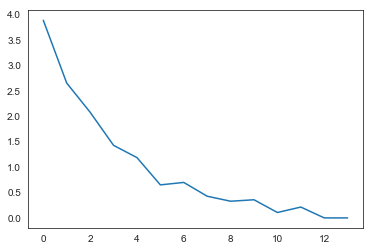

In [14]:
# scree plot
plt.plot(eig_val_cov)
plt.show()

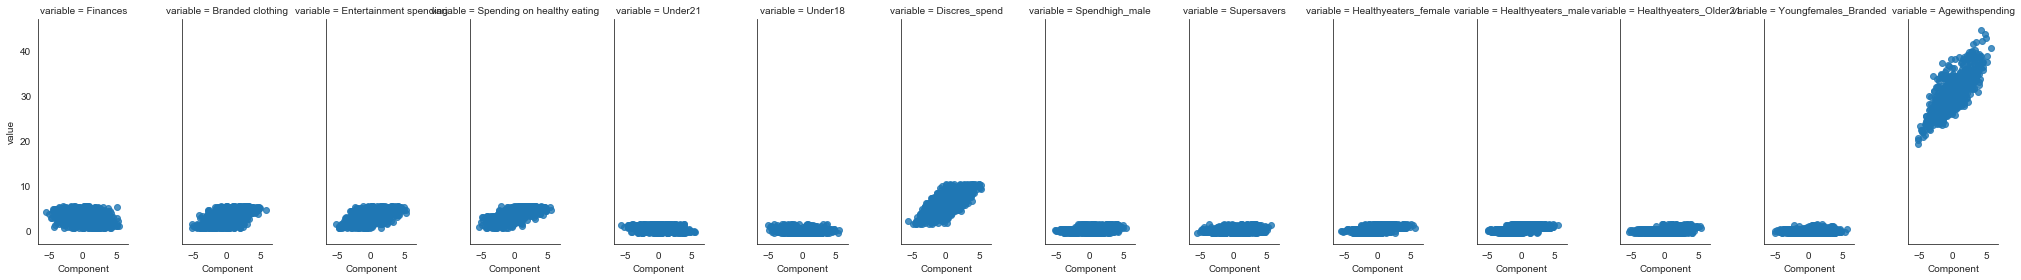

In [15]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[:]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.2774399  0.18928781 0.14833822 0.10189612 0.08466641]


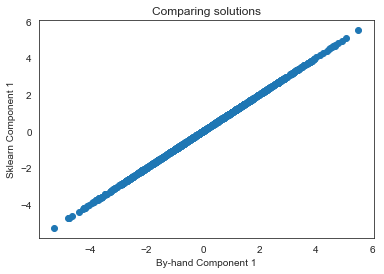

In [16]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()